[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 5.11

Analysis of movie duration and gross earnings\
Topics: Joint probability density function, conditional pdf, independence

Author: Carlos Fernandez-Granda\
Data source: www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

data = pd.read_csv('../data/movie_metadata.csv')
data.dropna(subset=['duration', 'gross'],inplace=True)

font_size = 20
font_size_ticks = 15

duration = data["duration"]
gross = data["gross"]/1e6

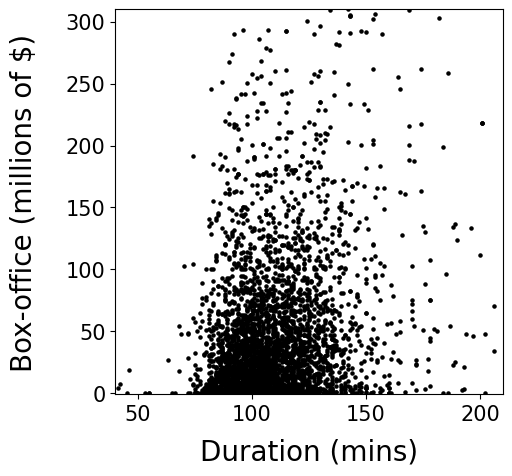

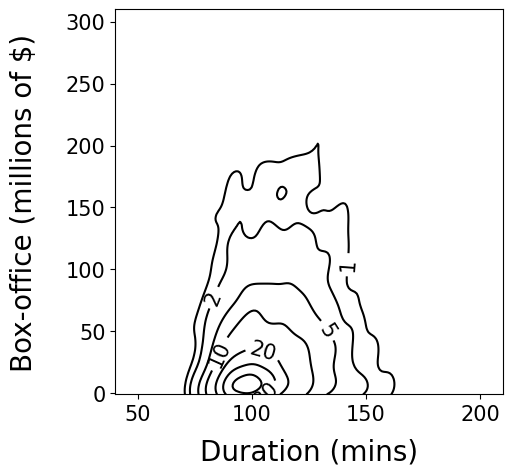

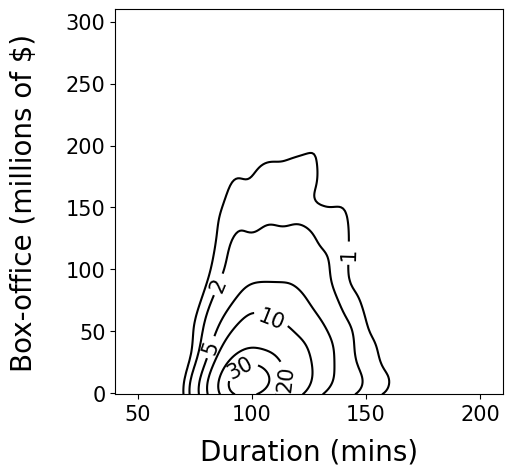

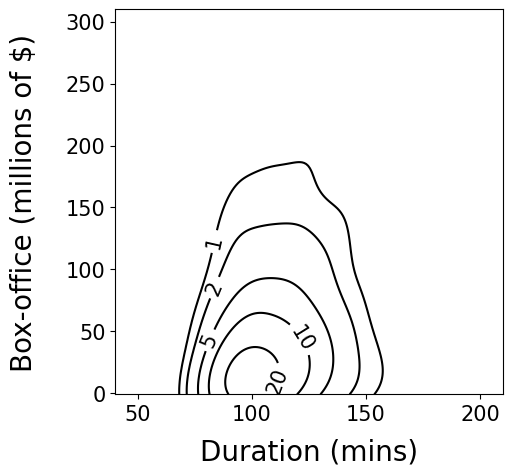

In [5]:
def KDE_2D(data_1,data_2,t_1,t_2,bw=None):
    x,y = np.meshgrid(t_1,t_2)
    grid = np.vstack([x.ravel(), y.ravel()])
    values = np.vstack([data_1, data_2])
    kernel = stats.gaussian_kde(values,bw_method=bw)
    kde = np.reshape(kernel(grid).T, x.shape)
    return kde

def fmt(x):
    s = f"{x:.0f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

xmin = 40 
xmax = 210
ymin = -1
ymax = 310

x_duration = np.linspace(xmin,xmax,200)
x_gross = np.linspace(ymin,ymax,200)

markersize = 5
plt.figure(figsize=(5,5))
plt.scatter(duration,gross,s=markersize,color="black")
plt.xticks([50,100,150,200],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([ymin,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Box-office (millions of $)",fontsize=font_size,labelpad = 20)
plt.xlabel("Duration (mins)",fontsize=font_size,labelpad = 10)

bw_vals = [0.15,0.2,0.3]
levels = [1,2,5,10,20,30,40]

for ind,bw in enumerate(bw_vals):
    kde = KDE_2D(duration,gross,x_duration,x_gross,bw=bw)
    plt.figure(figsize=(5,5))
    #plt.scatter(duration,gross,s=1,color="gray",alpha=0.3)
    CS = plt.contour(x_duration,x_gross, 1e5*kde, levels=levels,colors='black')
    plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
    plt.xticks([50,100,150,200],fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.ylabel("Box-office (millions of $)",fontsize=font_size,labelpad = 20)
    plt.xlabel("Duration (mins)",fontsize=font_size,labelpad = 10)

Text(0.5, 0, 'Box-office (millions of $)')

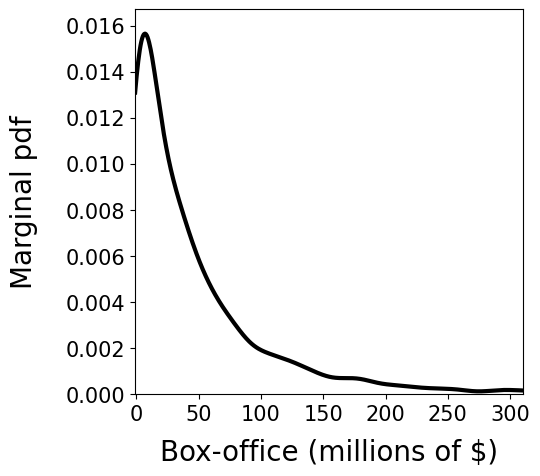

In [6]:
def KDE_1D(data,x,bw=None):
    kernel = stats.gaussian_kde(data,bw_method=bw)
    kde = kernel(x)
    return kde

y_max = 0.0167
x_gross = np.linspace(ymin,ymax,500)
bw = 0.15
kde = KDE_1D(gross,x_gross,bw=bw)
plt.figure(figsize=(5,5))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(x_gross,kde,color="black",lw=3)
#sns.kdeplot(temperature_2,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
plt.xlim([ymin,ymax])
plt.ylim([0,y_max])
plt.ylabel(r"Marginal pdf",fontsize=font_size,labelpad=20)
plt.xlabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)

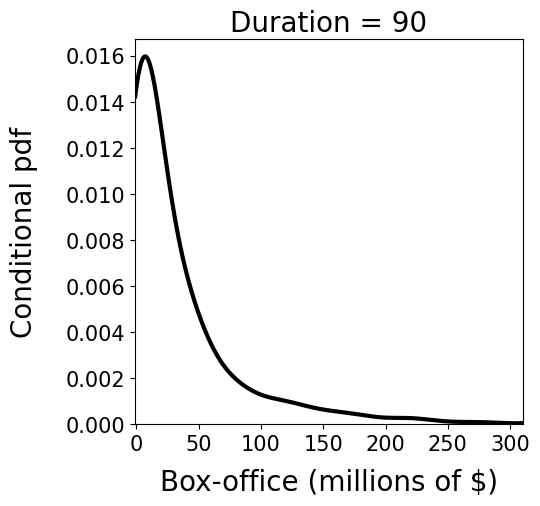

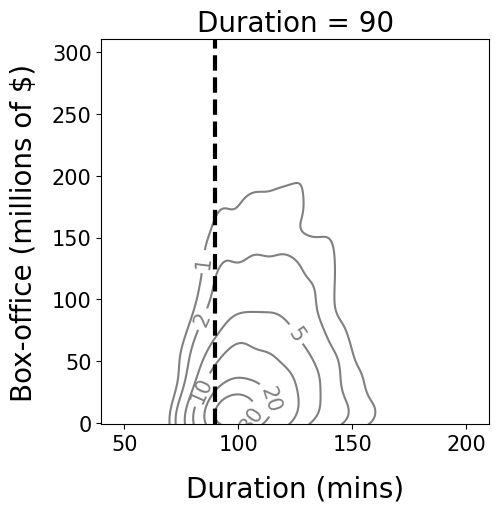

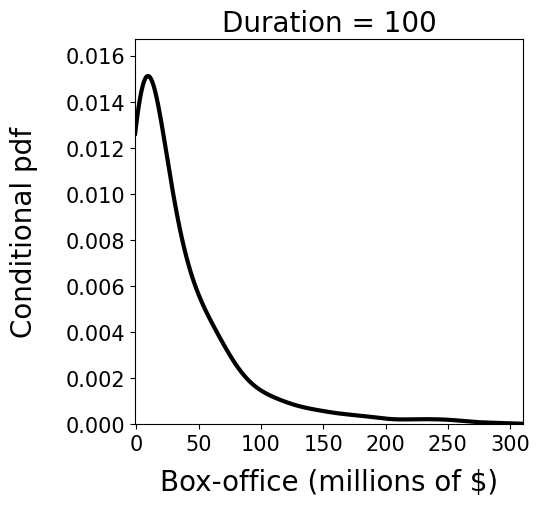

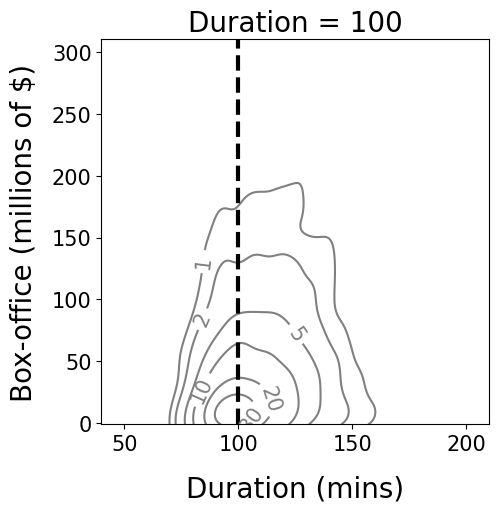

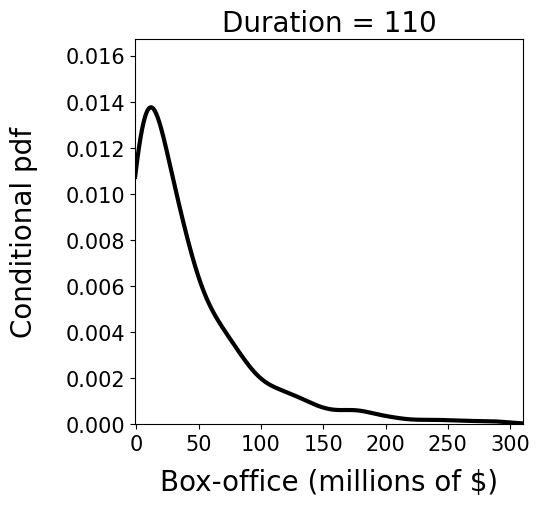

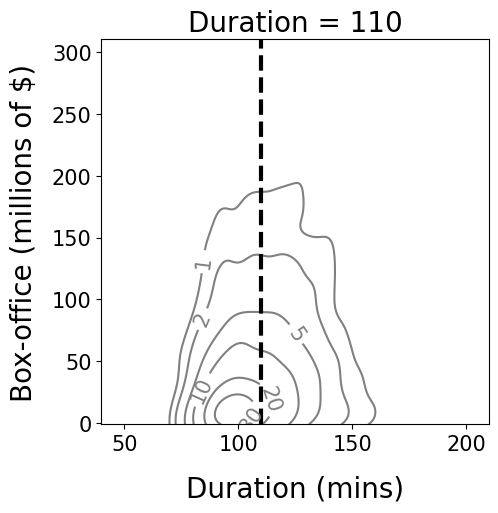

In [8]:
def KDE_cond(data,data_cond,val_cond,t,bw_1D=None,bw_2D=None,verbose=False):
    xmin = data.min()
    xmax = data.max()
    x,y = np.meshgrid(t,val_cond)
    grid = np.vstack([x.ravel(), y.ravel()])
    if verbose:
        print("Grid:")
        print(grid)
    values = np.vstack([data, data_cond])
    kernel_2D = stats.gaussian_kde(values,bw_method=bw_2D)
    kde_2D = np.reshape(kernel_2D(grid).T, x.shape)
    if verbose:
        print("kde_2D: ")
        print(kde_2D)
    kernel_1D = stats.gaussian_kde(data_cond,bw_method=bw)
    kde_1D = kernel_1D(val_cond)
    if verbose:
        print("kde_1D: ")
        print(kde_1D)
    kde_cond = kde_2D / kde_1D
    return kde_cond[0]

cond_vals = [90,100,110]
for ind,cond_val in enumerate(cond_vals):
    
    bw_1D = 0.15
    bw_2D = 0.2
    verbose = False
    kde = KDE_cond(gross,duration,cond_val,x_gross,bw_1D=bw_1D,bw_2D=bw_2D,verbose=verbose)
    plt.figure(figsize=(5,5))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(x_gross,kde,color="black",lw=3)
    plt.xlim([ymin,ymax])
    plt.ylim([0,y_max])
    plt.ylabel(r"Conditional pdf",fontsize=font_size,labelpad=20)
    plt.xlabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)
    plt.title("Duration = " + str(cond_val),fontsize=font_size)
    
    kde = KDE_2D(duration,gross,x_duration,x_gross,bw=bw_2D)
    levels = [1,2,5,10,20,30,40]
    plt.figure(figsize=(5,5))
    CS = plt.contour(x_duration,x_gross, 1e5*kde, levels=levels,colors='gray')
    plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
    plt.vlines(cond_val,ymin,ymax,lw=3,ls="dashed",color="black")
    plt.xticks([50,100,150,200],fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.ylabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)
    plt.xlabel("Duration (mins)",fontsize=font_size,labelpad = 15)
    plt.title("Duration = " + str(cond_val),fontsize=font_size)
    

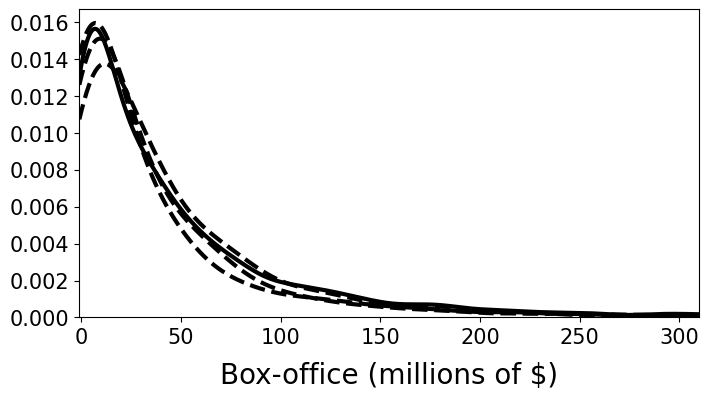

In [9]:
bw = 0.15
kde = KDE_1D(gross,x_gross,bw=bw)
plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(x_gross,kde,color="black",lw=3)
#sns.kdeplot(temperature_2,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
plt.xlim([ymin,ymax])
plt.ylim([0,y_max])
plt.xlabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)

cond_vals = [90,100,110]
for ind,cond_val in enumerate(cond_vals):
    
    bw_1D = 0.15
    bw_2D = 0.2
    verbose = False
    kde = KDE_cond(gross,duration,cond_val,x_gross,bw_1D=bw_1D,bw_2D=bw_2D,verbose=verbose)
    plt.plot(x_gross,kde,color="black",lw=3,ls='dashed')    